## Astrostatistics and Data Mining - Pset 2
### Ruan Hsuan Wei
### 2/17/2017

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import math

### Q1
#### a)

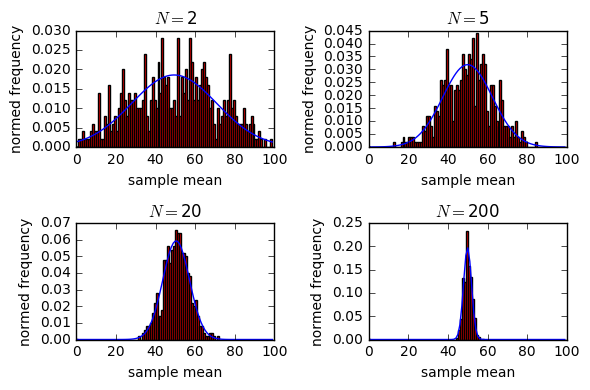

In [2]:
N=[2, 5, 20, 200]
f, ax = plt.subplots(2, 2)
ax = ax.flatten()
index=0
xnum=np.arange(0,100)
for i,a in enumerate(ax):
    m=[]
    for n in range(500):
        s=np.random.uniform(0,100,N[i])
        m.append(np.mean(s))
    norm = stats.norm.pdf(xnum, np.mean(m), np.std(m))
    a.hist(m,bins=np.arange(0,101),color='r',normed=True)
    a.plot(xnum,norm,color='blue')
    a.set_title(r'$N=$%d' %N[i])
    a.set_xlabel("sample mean")
    a.set_ylabel('normed frequency')
plt.tight_layout() 
plt.show()

#### b)

In [3]:
# data from pset 1
a=2
Nsize=1000
mean=0
ynum=[0 for i in range(Nsize+1)]
xnum=np.linspace(-1*a,a,Nsize) #generate datas of x axis

for i in range(Nsize):
    if xnum[i]<0:
        ynum[i]=(1/float(math.pow(a,2)))*xnum[i]+(1/float(a)) # y function for negative x
    else:
        ynum[i]=(-1/float(math.pow(a,2)))*xnum[i]+(1/float(a)) # y function for 0 and positive x
    mean+=xnum[i]*ynum[i]


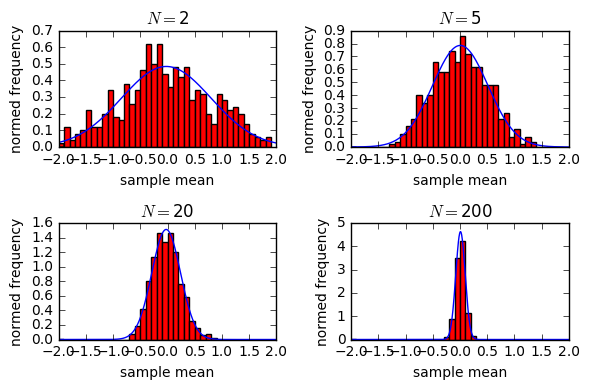

In [4]:
N=[2, 5, 20, 200]
f, ax = plt.subplots(2, 2)
ax = ax.flatten()
index=0
for i,a in enumerate(ax):
    m=[]
    for n in range(500):
        s=np.random.choice(xnum,N[i],ynum)
        m.append(np.mean(s))
    norm = stats.norm.pdf(xnum, np.mean(m), np.std(m))
    a.hist(m,bins=np.arange(-2,2,0.1),color='r',normed=True)
    a.plot(xnum,norm,color='blue')
    a.set_title(r'$N=$%d' %N[i])
    a.set_xlabel("sample mean")
    a.set_ylabel('normed frequency')
plt.tight_layout() 
plt.show()

### Q2

In [5]:
pd.options.mode.chained_assignment = None  # get rid of warnings

#tell pandas to display wide tables as pretty HTML tables
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [10]:
data = pd.read_csv('exoplanets.csv')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


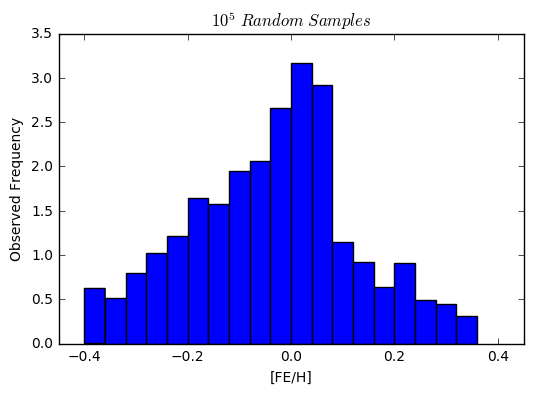

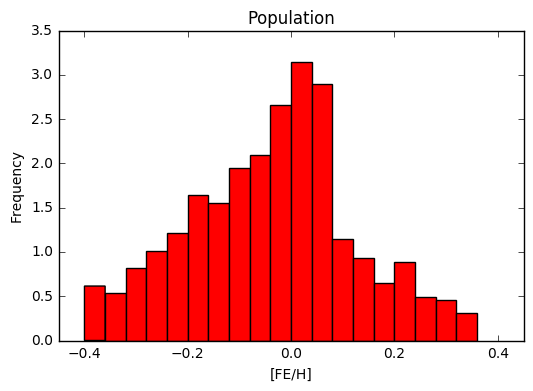

In [12]:
#sample distribution
num=np.random.choice(data.FE[(data.FE >= -0.4) & (data.FE <= 0.4)],1e5)
plt.hist(num,bins=np.arange(-0.4,0.4,0.04),color='b',normed=True)
plt.xlim(-0.45,0.45)
plt.title(r'$10^5\ Random\ Samples$')
plt.xlabel('[FE/H]')
plt.ylabel('Observed Frequency')
plt.show()

# population distribution
num=data.FE[(data.FE >= -0.4) & (data.FE <= 0.4)]
plt.hist(num,bins=np.arange(-0.4,0.4,0.04),color='r',normed=True)
plt.xlim(-0.45,0.45)
plt.title('Population')
plt.xlabel('[FE/H]')
plt.ylabel('Frequency')
plt.show()


These two distribution looks similar.I would test if these two distribution come from the same parent distribution by calculating the likelihood estimation and confidence interval from the sample distribution. If the population distribution's parameters fits in the estimation, then the two distributions might come from the same parent distribution.

### Q3

#### a)
$L(\theta)=f(yi\ |\ a,b,xi,\sigma)=prob(x1,x2...,xn)=\prod\frac{1}{\sigma\sqrt{2\pi}}exp[\frac{-(yi-(axi+b))^2}{2\sigma^2}]$

#### b)
i) 
$$L(\theta)=\prod\frac{1}{\sigma\sqrt{2\pi}}exp[\frac{-(yi-(axi+b))^2}{2\sigma^2}]\\
=\frac{1}{\sigma\sqrt{2\pi}}exp[\frac{-(8-a-b)^2-(2-3a-b)^2-(1-5a-b)^2}{2\sigma^2}]\\\\
\ell=constant\times(\frac{-(8-a-b)^2-(2-3a-b)^2-(1-5a-b)^2}{2\sigma^2})
$$
ii)
$$\\
L(\theta)=\prod\frac{1}{\sigma\sqrt{2\pi}}exp[\frac{-(yi-(axi+b))^2}{2\sigma^2}]\\
\ell=constant\times(\frac{\sum_{i=1}^n -(yi-(axi+b))^2}{2\sigma^2})
$$



#### c)
The formula to estimate parameters a and b is 
$$ a=\frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^2}$$
$$b=(\sum Y - a(\sum X)) / N$$
the formula to calculate confidence interval for a is 
$$a\pm t_{value}(\frac{\sqrt{MSE}}{\sqrt{\sum(x-\bar{x})^2}})$$
$$b\pm t_{value}\sqrt{MSE}\sqrt{\frac{1}{N}+\frac{\bar{x}^2}{\sum (x-\bar{x})^2}}$$
Mean Square Error=
$$MSE=\frac{1}{N}\sum (\widehat{Y}-y_i)^2$$


In [8]:
#data
x=[1,3,5]
y=[8,2,1]

#estimate a
a=0
ab=0
for i in range(3):
    a += ((x[i]-np.mean(x))*(y[i]-np.mean(y)))
    ab+=((x[i]-np.mean(x))**2)
a=a/ab*1.0
print "estimation of a is %f" %(a*1.0)

#estimate b
b=(sum(y)-a*sum(x))/3*1.0
print "estimation of b is %f" %b

#confidence interval
sumn=0
for i in range(3):
    sumn+=((a*x[i]+b)-y[i])**2
sumn=sumn/3

#mean square error
mse=0
for i in range(3):
    mse+=(a*x[i]+b-y[i])**2
mse=mse/3.0

print "confidence interval of a=[%f,%f]"%((a+12.7*(math.sqrt(sumn)/math.sqrt(ab))),(a-12.7*(math.sqrt(sumn)/math.sqrt(ab))))
print "confidence interval of b=[%f,%f]" %((b-12.7*math.sqrt(mse)*math.sqrt(1/3.0+sum(x)/ab)),(b+12.7*math.sqrt(mse)*math.sqrt(1/3.0+sum(x)/ab)))


estimation of a is -1.750000
estimation of b is 8.916667
confidence interval of a=[3.541667,-7.041667]
confidence interval of b=[-9.157816,26.991149]


#### d)

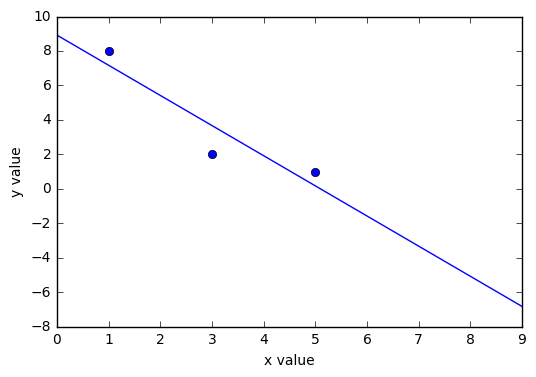

In [9]:
xdata=[1,3,5]
ydata=[8,2,1]
xnum=np.arange(0,10)
y = [a*x + b for x in xnum]
plt.plot(xnum,y)
plt.plot(xdata,ydata,'bo')
plt.xlabel('x value')
plt.ylabel('y value')
plt.show()

### Q4
#### a)
$$prob(x1,x2,...,x5)=\frac{1}{b-a}\times \frac{1}{b-a}\times \frac{1}{b-a}\times \frac{1}{b-a}\times \frac{1}{b-a}\\
=\frac{1}{(b-a)^5}\\$$
In order to maximize likelihood estimation, we have to minimize (b-a). From the given data, we know that the possible minimum value of b-a is when b=10.5 and a=1.2.



#### b)
$$prob(x1,x2,...,xn)=\frac{1}{(b-a)^n}\\$$
In order to maximize likelihood estimation, we have to minimize(b-a). Thus, the maximum estimate for parameters a and b are b=max(x1...xn) and a=min(x1...xn).